In [188]:
API_KEY = alpha_vantage
import requests
function = 'CURRENCY_EXCHANGE_RATE'
symbol = 'IBM'
interval = '1min'

fields = {'key': API_KEY, 'function': function, 'symbol': symbol, 'interval': interval}
response = requests.get("https://www.alphavantage.co", params=fields)
ts = TimeSeries(key=API_KEY, output_format='pandas')

from_currency='USD'
symbol = 'AAPL'
interval = '15min'
data, meta_data = ts.get_intraday(symbol=symbol, interval=interval)

# Display the data
print(data.head())

                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2024-02-09 19:45:00  188.590   188.62  188.52    188.53     6265.0
2024-02-09 19:30:00  188.610   188.64  188.52    188.60    11907.0
2024-02-09 19:15:00  188.610   188.64  188.55    188.60     6784.0
2024-02-09 19:00:00  188.600   188.62  188.60    188.62     2042.0
2024-02-09 18:45:00  188.575   188.65  188.55    188.61     4777.0


In [2]:
from alpha_vantage.timeseries import TimeSeries as av


from datetime import datetime
search_date = datetime.now().date().strftime('%Y-%m-%d')

class FundamentalData(av):

    """This class implements all the api calls to fundamental data
    """
    def __init__(self, *args, **kwargs):
        """
        Inherit AlphaVantage base class with its default arguments.
        """
        super(FundamentalData, self).__init__(*args, **kwargs)
        self._append_type = False
        if self.output_format.lower() == 'csv':
            raise ValueError("Output format {} is not compatible with the FundamentalData class".format(
                self.output_format.lower()))

    @av._output_format
    @av._call_api_on_func
    def get_company_overview(self, symbol):
        """
        Returns the company information, financial ratios, 
        and other key metrics for the equity specified. 
        Data is generally refreshed on the same day a company reports its latest 
        earnings and financials.

        Keyword Arguments:
            symbol:  the symbol for the equity we want to get its data
        """
        _FUNCTION_KEY = 'OVERVIEW'
        return _FUNCTION_KEY, None, None

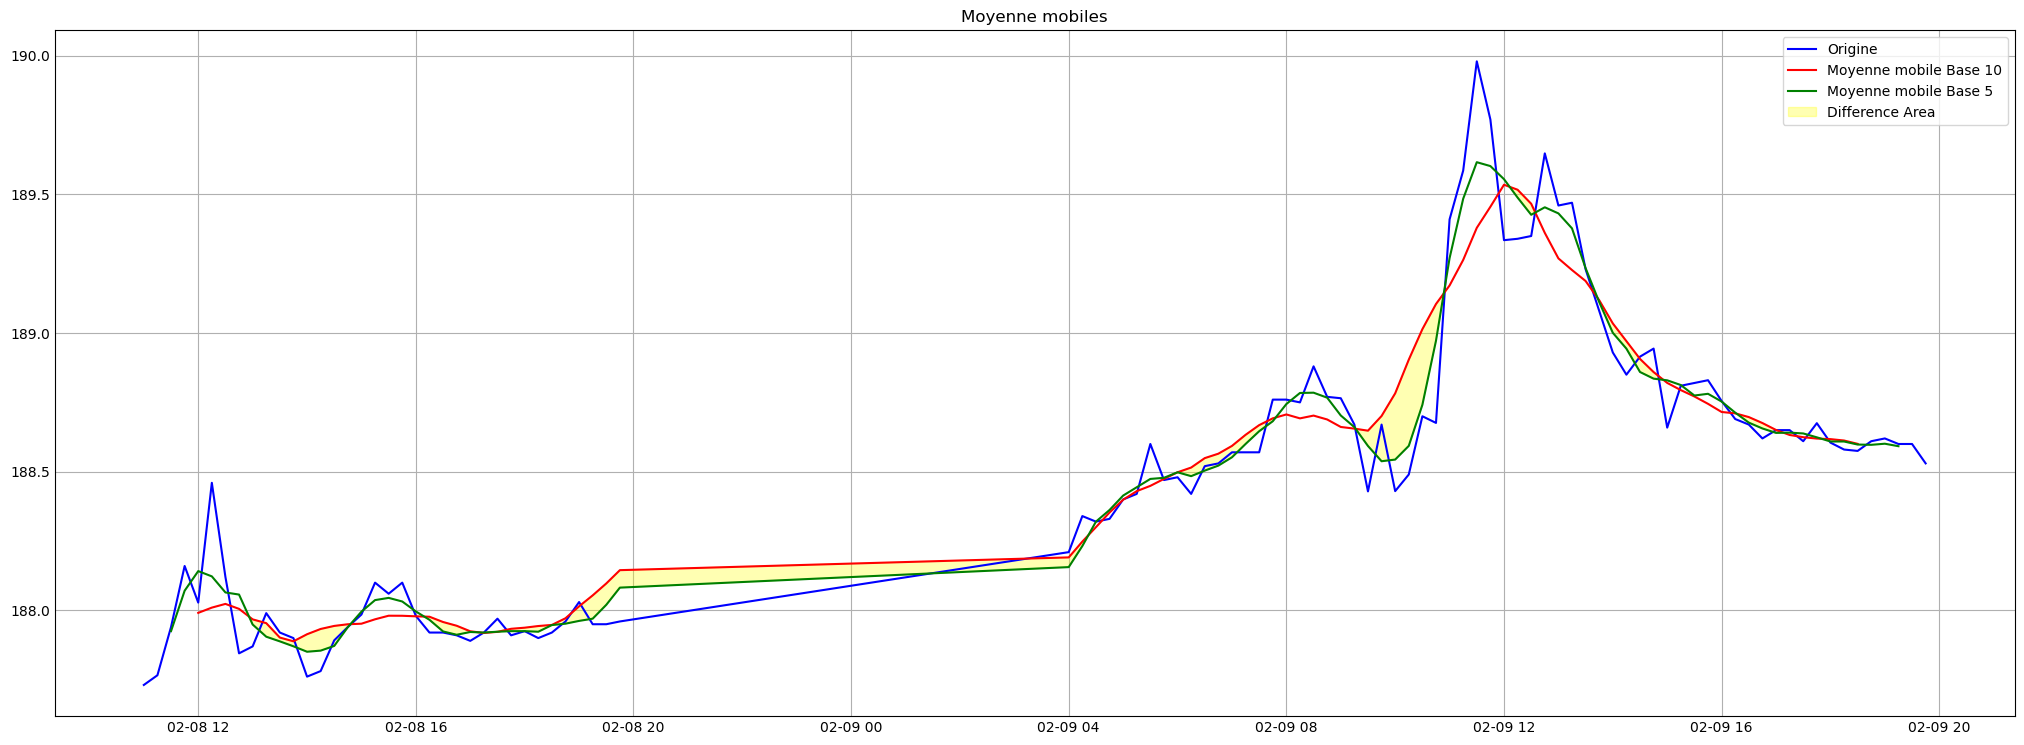

In [195]:
symbol = 'AAPL'
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries 


mean_100 = data['4. close'].rolling(window = 10, center = True).mean()
mean_50 = data['4. close'].rolling(window = 5, center = True).mean()
#Affichage de la série 
plt.figure(figsize=(20,7))
plt.plot(data['4. close'], color = 'blue', label = 'Origine')
plt.plot(mean_100, color = 'red', label = 'Moyenne mobile Base 10')
plt.plot(mean_50, color = 'green', label = 'Moyenne mobile Base 5')
plt.fill_between(mean_100.index, mean_100, mean_50, where=(mean_100 > mean_50), interpolate=True, color='yellow', alpha=0.3, label='Difference Area')
plt.legend()
plt.title('Moyenne mobiles')
plt.show()

In [44]:
import requests
tickers = 'AAPL'
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=AAPL&apikey={API_KEY}'
r = requests.get(url)
data = r.json()

try:
    # Make the API request
    r = requests.get(url)

    # Check if the request was successful (status code 200)
    if r.status_code == 200:
        data = r.json()

        # Extract information from the first 10 feed items if available
        feed_items = data.get('feed', [])

        for i, feed_item in enumerate(feed_items[:10]):
            overall_sentiment_score = feed_item.get('overall_sentiment_score')
            category = feed_item.get('category_within_source')
            authors = feed_item.get('authors')
            summary = feed_item.get('summary')
            url = feed_item.get('url')

            print(f"\nEntry {i + 1}")
            print(f"Overall Sentiment Score for {tickers}: {overall_sentiment_score}")
            print(f"Overall Category for {tickers}: {category}")
            print(f"Overall authors for {tickers}: {authors}")
            print(f"Overall summary for {tickers}: {summary}")
            print(f"Overall url for {tickers}: {url}")

    else:
        print(f"Error: Unable to fetch data. Status code: {r.status_code}")

except Exception as e:
    print(f"Error: {e}")



In [27]:
import requests
tickers = 'AAPL'
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=AAPL&apikey={API_KEY}'
r = requests.get(url)
data = r.json()

In [31]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TOP_GAINERS_LOSERS&apikey={API_KEY}'
r = requests.get(url)
Top_Gainer_loser = r.json()

print(Top_Gainer_loser)

{'metadata': 'Top gainers, losers, and most actively traded US tickers', 'last_updated': '2024-02-09 16:16:00 US/Eastern', 'top_gainers': [{'ticker': 'LIXTW', 'price': '0.09', 'change_amount': '0.0598', 'change_percentage': '198.0132%', 'volume': '14166'}, {'ticker': 'INBS', 'price': '6.765', 'change_amount': '3.885', 'change_percentage': '134.8958%', 'volume': '88308425'}, {'ticker': 'PRSTW', 'price': '0.0237', 'change_amount': '0.0132', 'change_percentage': '125.7143%', 'volume': '384'}, {'ticker': 'BCSAW', 'price': '0.0444', 'change_amount': '0.0234', 'change_percentage': '111.4286%', 'volume': '1500'}, {'ticker': 'PTWOW', 'price': '0.0655', 'change_amount': '0.0334', 'change_percentage': '104.0498%', 'volume': '50620'}, {'ticker': 'NSTG', 'price': '0.23', 'change_amount': '0.1138', 'change_percentage': '97.9346%', 'volume': '415715703'}, {'ticker': 'GROY+', 'price': '0.03', 'change_amount': '0.0144', 'change_percentage': '92.3077%', 'volume': '12870'}, {'ticker': 'SUNW', 'price': '

In [36]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://alphavantageapi.co/timeseries/analytics?SYMBOLS=AAPL,MSFT,IBM&RANGE=2024-02-09&RANGE=2024-02-10&INTERVAL=1min&OHLC=close&CALCULATIONS=MEAN,STDDEV,HISTOGRAM(bins=3)&apikey={API_KEY}'
r = requests.get(url)
data = r.json()

print(data)

{'meta_data': {'symbols': 'IBM,AAPL,MSFT', 'min_dt': '2024-02-09T09:30:00-05:00', 'max_dt': '2024-02-09T15:59:00-05:00', 'ohlc': 'Close', 'interval': 'OneMinute'}, 'payload': {'RETURNS_CALCULATIONS': {'MEAN': {'IBM': 3.0500061284941846e-05, 'AAPL': 6.050059199257553e-06, 'MSFT': 2.9502187454636947e-05}, 'STDDEV': {'IBM': 0.00045775941381134074, 'AAPL': 0.00032551082014169625, 'MSFT': 0.000338713748213348}, 'HISTOGRAM(BINS=3)': {'IBM': {'bin_count': [192, 193, 3], 'bin_edges': [-0.0015, 0.0, 0.0015, 0.003]}, 'AAPL': {'bin_count': [192, 196, 0], 'bin_edges': [-0.0015, 0.0, 0.0015, 0.003]}, 'MSFT': {'bin_count': [188, 200, 1], 'bin_edges': [-0.0015, 0.0, 0.0015, 0.003]}}}}}


Mean for IBM: 3.0500061284941846e-05
STDDEV for IBM: 0.00045775941381134074

Mean for AAPL: 6.050059199257553e-06
STDDEV for AAPL: 0.00032551082014169625

Mean for MSFT: 2.9502187454636947e-05
STDDEV for MSFT: 0.000338713748213348



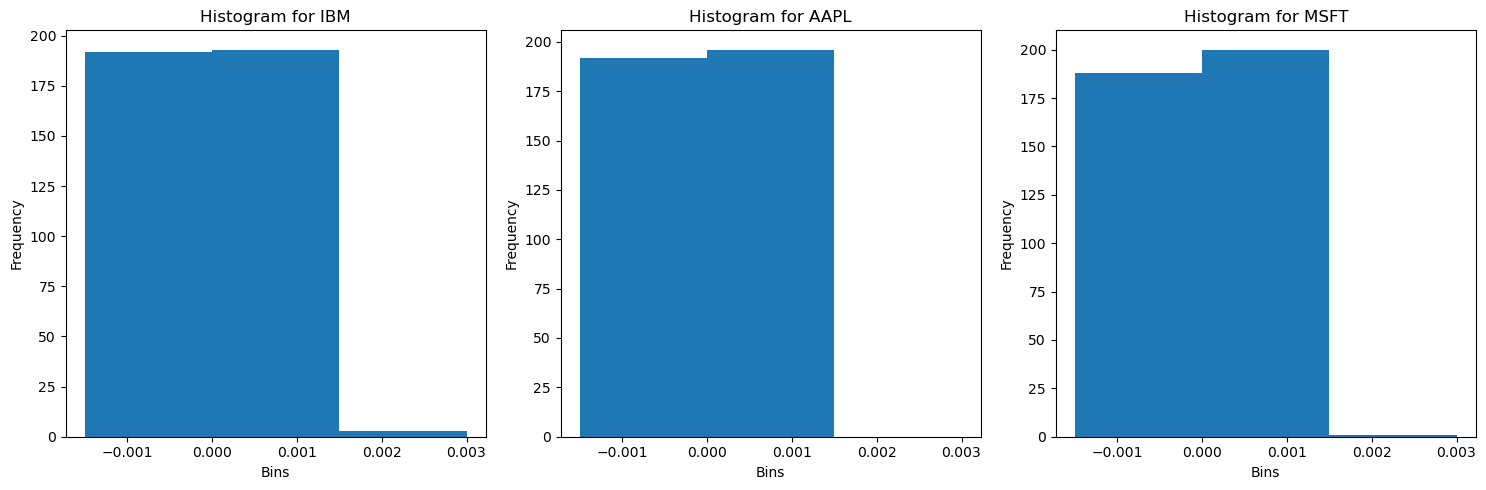

In [38]:
import numpy as np
mean_values = data['payload']['RETURNS_CALCULATIONS']['MEAN']
stddev_values = data['payload']['RETURNS_CALCULATIONS']['STDDEV']

# Print mean and STDDEV
for symbol, mean in mean_values.items():
    stddev = stddev_values[symbol]
    print(f"Mean for {symbol}: {mean}")
    print(f"STDDEV for {symbol}: {stddev}")
    print()

# Plot histograms
fig, axes = plt.subplots(nrows=1, ncols=len(data['payload']['RETURNS_CALCULATIONS']['HISTOGRAM(BINS=3)']), figsize=(15, 5))

for i, (symbol, histogram) in enumerate(data['payload']['RETURNS_CALCULATIONS']['HISTOGRAM(BINS=3)'].items()):
    bin_edges = histogram['bin_edges']
    bin_count = histogram['bin_count']
    
    ax = axes[i]
    ax.bar(bin_edges[:-1], bin_count, width=np.diff(bin_edges), align='edge')
    ax.set_title(f'Histogram for {symbol}')
    ax.set_xlabel('Bins')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [45]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=OVERVIEW&symbol=AAPL&apikey={API_KEY}'
r = requests.get(url)
overview = r.json()

print(overview)

{'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}


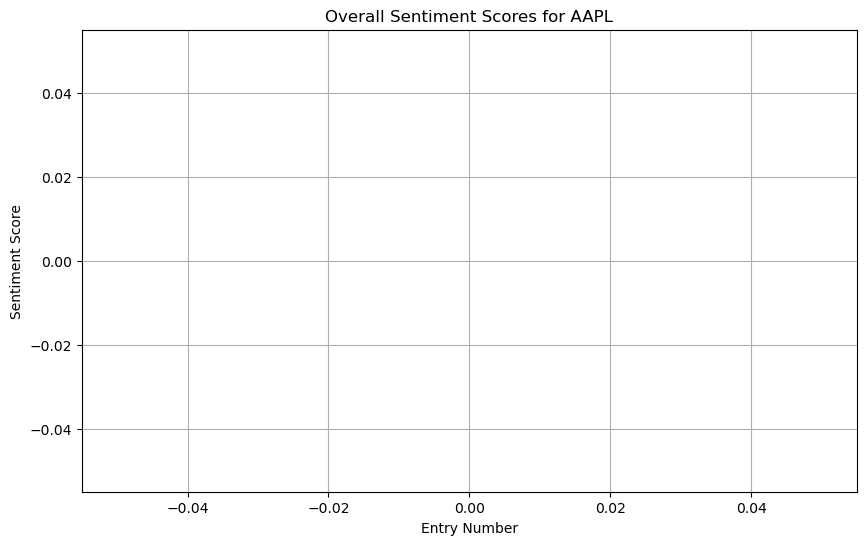

In [46]:
try:
    # Make the API request
    r = requests.get(url)

    # Check if the request was successful (status code 200)
    if r.status_code == 200:
        data = r.json()

        # Extract information from the first 10 feed items if available
        feed_items = data.get('feed', [])

        # Lists to store sentiment scores and entry numbers
        entry_numbers = []
        sentiment_scores = []

        for i, feed_item in enumerate(feed_items[:10]):
            overall_sentiment_score = feed_item.get('overall_sentiment_score')

            # Print information
            print(f"\nEntry {i + 1}")
            print(f"Overall Sentiment Score for {tickers}: {overall_sentiment_score}")

            # Store sentiment scores for plotting
            entry_numbers.append(i + 1)
            sentiment_scores.append(overall_sentiment_score)

        # Plot sentiment scores
        plt.figure(figsize=(10, 6))
        plt.plot(entry_numbers, sentiment_scores, marker='o', linestyle='-', color='b')
        plt.title(f'Overall Sentiment Scores for {tickers}')
        plt.xlabel('Entry Number')
        plt.ylabel('Sentiment Score')
        plt.grid(True)
        plt.show()

    else:
        print(f"Error: Unable to fetch data. Status code: {r.status_code}")

except Exception as e:
    print(f"Error: {e}")

In [42]:
overall_sentiment_score


0.155758

In [57]:
response = requests.get('https://info-financiere.fr/api/explore/v2.1/catalog/datasets/societes-cac40/records?limit=20')
if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print(f"Error: Unable to fetch data. Status code: {response.status_code}")


{'total_count': 1055, 'results': [{'id': 81, 'name': 'ACCOR', 'isin': 'FR0000120404', 'rcs': '602036444', 'cac40': '1', 'name_cac40': 'ACCOR', 'first_letter': 'A'}, {'id': 85, 'name': 'ALSTOM', 'isin': 'FR0010220475', 'rcs': '389058447', 'cac40': '1', 'name_cac40': 'ALSTOM', 'first_letter': 'A'}, {'id': 94, 'name': 'DEXIA', 'isin': 'BE0003796134', 'rcs': None, 'cac40': '0', 'name_cac40': None, 'first_letter': 'D'}, {'id': 98, 'name': 'ORANGE', 'isin': 'FR0000133308', 'rcs': '380129866', 'cac40': '1', 'name_cac40': 'ORANGE', 'first_letter': 'O'}, {'id': 102, 'name': 'LAGARDERE S.C.A.', 'isin': 'FR0000130213', 'rcs': '320366446', 'cac40': '0', 'name_cac40': None, 'first_letter': 'L'}, {'id': 106, 'name': 'PEUGEOT', 'isin': 'FR0000121501', 'rcs': '552100554', 'cac40': '0', 'name_cac40': None, 'first_letter': 'P'}, {'id': 113, 'name': 'STMICROELECTRONICS', 'isin': 'NL0000226223', 'rcs': None, 'cac40': '1', 'name_cac40': 'STMICROELECTRONICS', 'first_letter': 'S'}, {'id': 116, 'name': 'UNIBA

In [185]:
access_key = marketstack
symbols = 'AAPL'
interval = "15min"
fields = {'access_key': access_key, 'symbols': symbols, "interval": interval}
response = requests.get("http://api.marketstack.com/v1/eod", params=fields)
result = response.json()


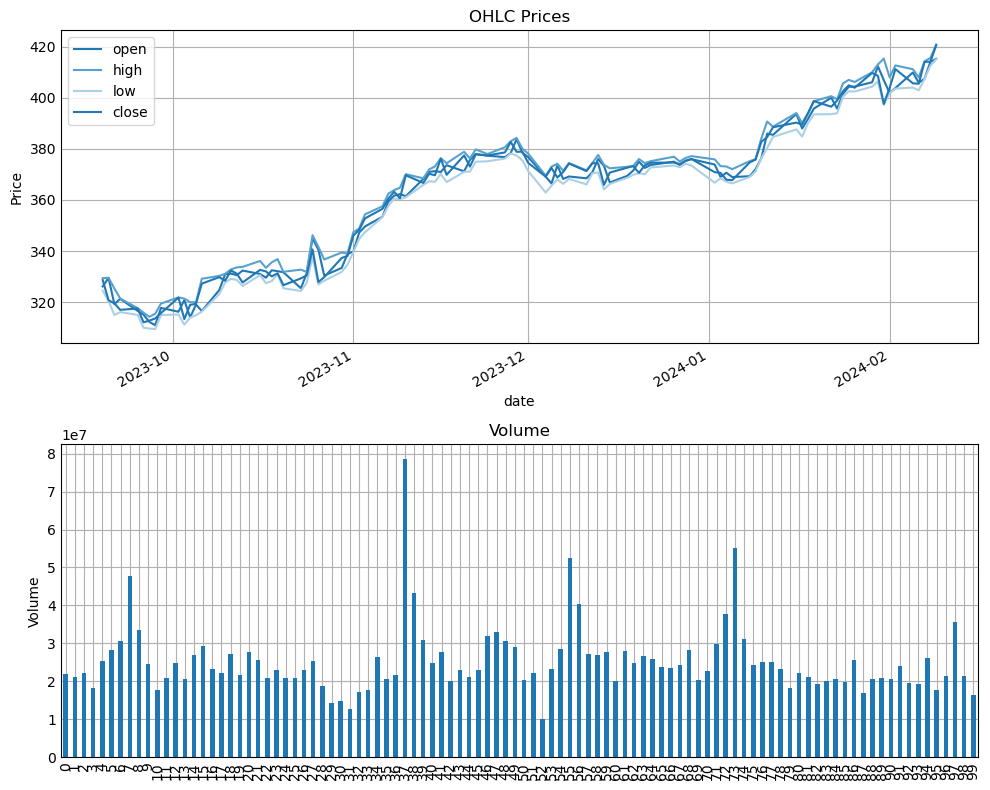

In [187]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame
df = pd.DataFrame(result['data'])

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df.date)
AAPL = df[df['symbol']=='AAPL']
# Plot the data
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot OHLC
AAPL[['open', 'high', 'low', 'close', 'date']].plot(ax=axes[0], x='date', kind='line', title='OHLC Prices')
axes[0].set_ylabel('Price')

# Plot Volume
AAPL['volume'].plot(ax=axes[1], x='date', kind='bar', title='Volume')
axes[1].set_ylabel('Volume')

plt.tight_layout()
plt.show()

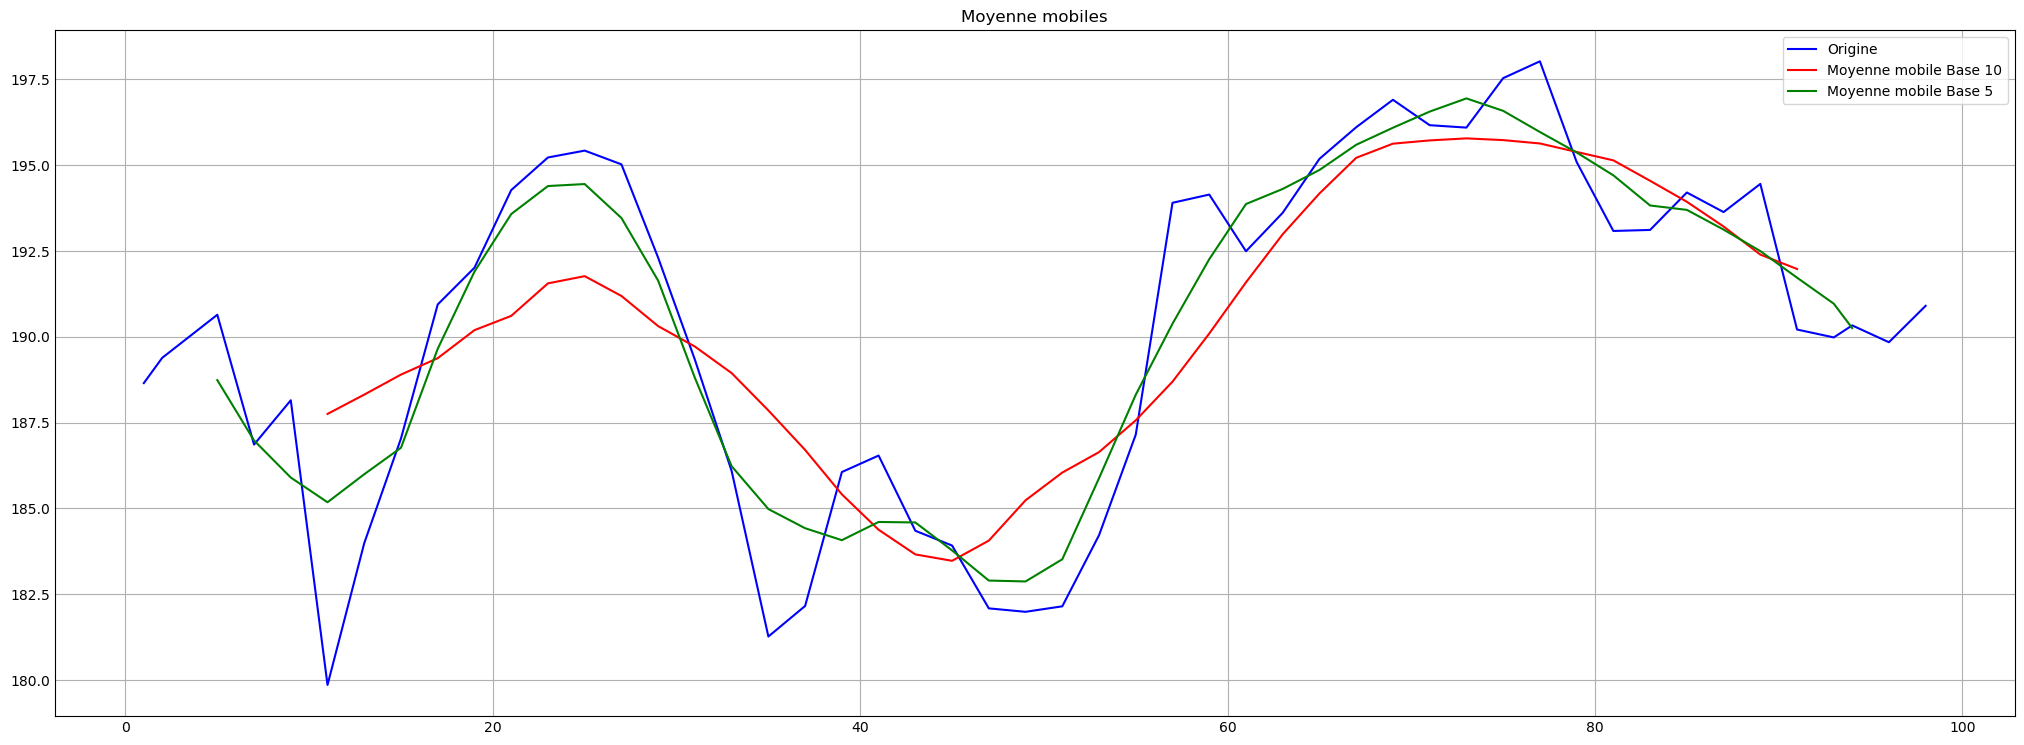

In [121]:
mean_100 = AAPL['open'].rolling(window = 10, center = True).mean()
mean_50 = AAPL['open'].rolling(window = 5, center = True).mean()
#Affichage de la série 
plt.figure(figsize=(20,7))
plt.plot(AAPL['open'], color = 'blue', label = 'Origine')
plt.plot(mean_100, color = 'red', label = 'Moyenne mobile Base 10')
plt.plot(mean_50, color = 'green', label = 'Moyenne mobile Base 5')
plt.legend()
plt.title('Moyenne mobiles')
plt.show()

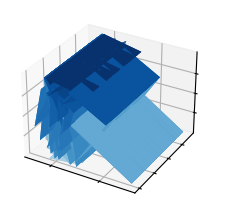

In [116]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm

plt.style.use('_mpl-gallery')

# Make data
X = AAPL['volume']
Y = AAPL['open']
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=cm.Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

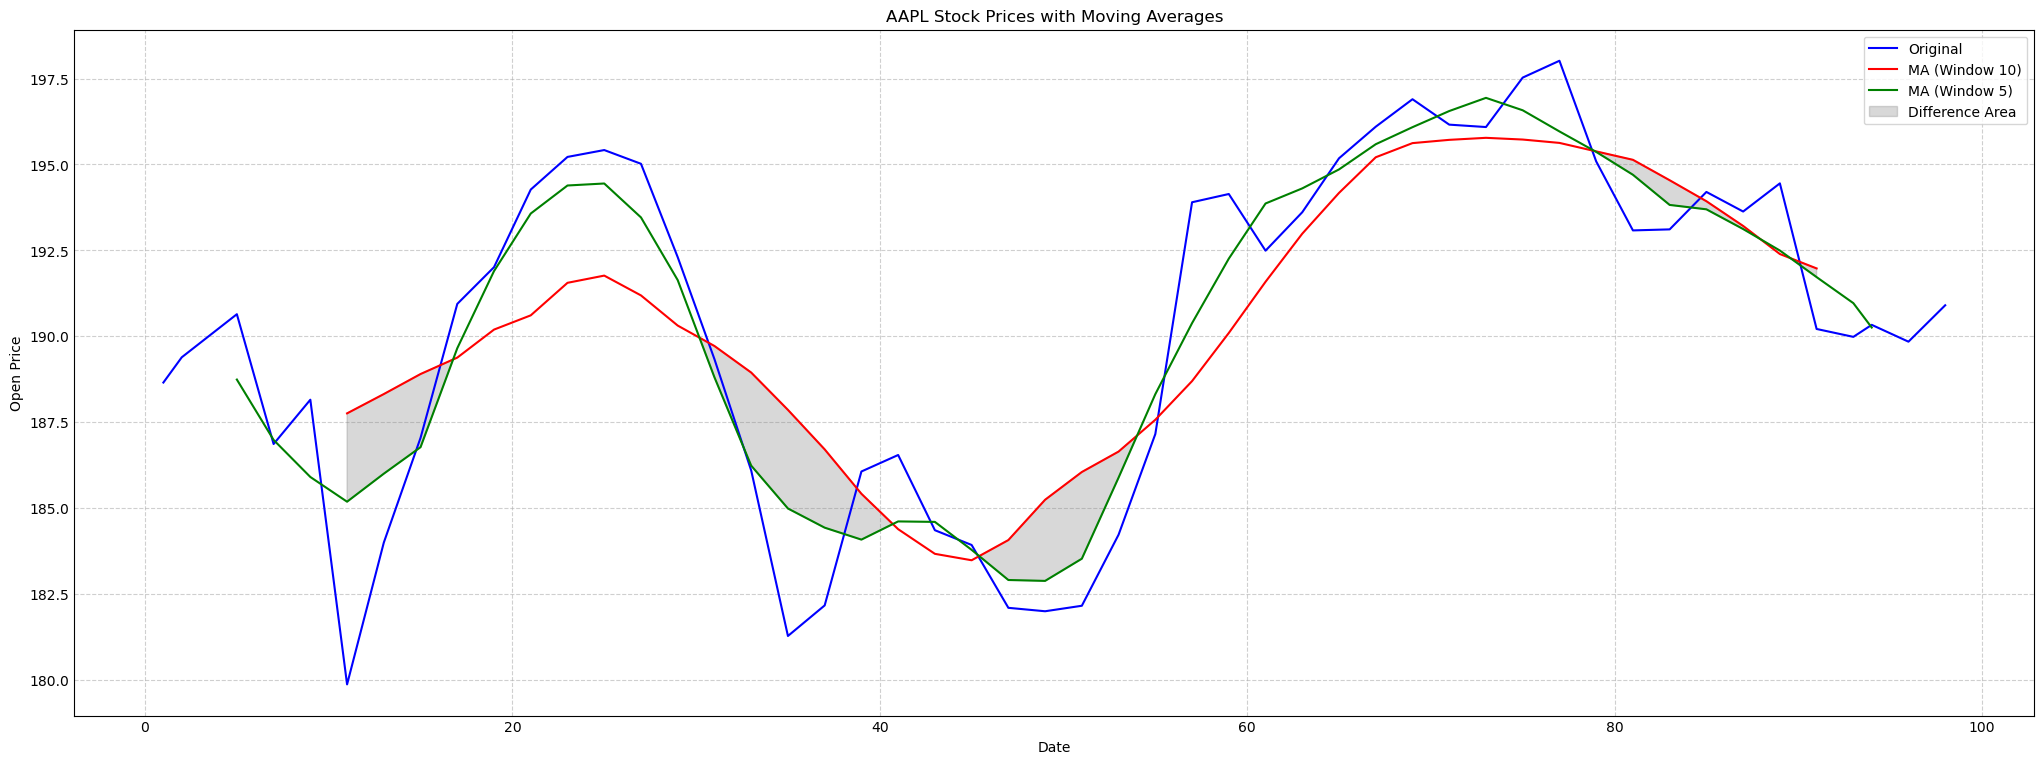

In [123]:
import matplotlib.pyplot as plt

# Assuming 'AAPL' is your DataFrame
mean_100 = AAPL['open'].rolling(window=10, center=True).mean()
mean_50 = AAPL['open'].rolling(window=5, center=True).mean()

# Customizing the figure
plt.figure(figsize=(20, 7))

# Plotting the original data
plt.plot(AAPL['open'], color='blue', label='Original')

# Plotting the moving averages
plt.plot(mean_100, color='red', label='MA (Window 10)')
plt.plot(mean_50, color='green', label='MA (Window 5)')

# Filling between the two moving averages
plt.fill_between(mean_100.index, mean_100, mean_50, where=(mean_100 > mean_50), interpolate=True, color='gray', alpha=0.3, label='Difference Area')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('AAPL Stock Prices with Moving Averages')

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.6)

# Adding legend
plt.legend()

plt.show()


In [154]:
import yfinance as yf

# Télécharger les données
df = yf.download('GC=F', start='1984-01-01', end='2024-02-10')

# Afficher les données
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0
2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2
2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0
...,...,...,...,...,...,...
2024-02-05,2038.900024,2040.800049,2013.800049,2025.699951,2025.699951,412
2024-02-06,2025.900024,2037.300049,2025.900024,2034.500000,2034.500000,249
2024-02-07,2032.800049,2039.500000,2032.699951,2035.199951,2035.199951,71


Text(0, 0.5, 'Volume')

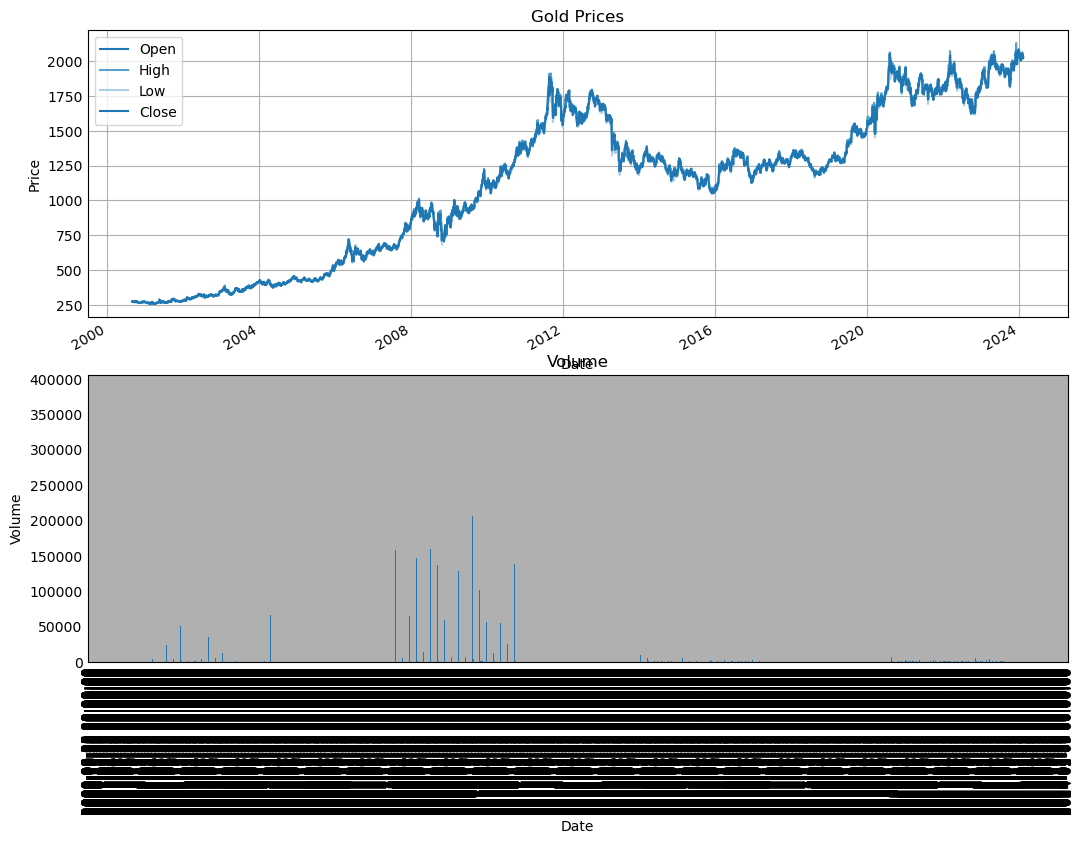

In [168]:
df['Date'] = df.index
df['Date'] = pd.to_datetime(df.Date)

# Plot the data
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot OHLC
df[['Open', 'High', 'Low', 'Close', 'Date']].plot(ax=axes[0], x='Date', kind='line', title='Gold Prices')
axes[0].set_ylabel('Price')

# Plot Volume
df['Volume'].plot(ax=axes[1], x='Date', kind='bar', title='Volume')
axes[1].set_ylabel('Volume')